## LOAN PREDICTION ANALYSIS
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a standard supervised classification task.A classification problem where we have to predict whether a loan would be approved or not. Below is the dataset attributes with description.

1. Variable - 	Description
2. Loan_ID	- Unique Loan ID
3. Gender	- Male/ Female
4. Married	- Applicant married (Y/N)
5. Dependents	- Number of dependents
6. Education	- Applicant Education (Graduate/ Under Graduate)
7. Self_Employed	- Self employed (Y/N)
8. ApplicantIncome	- Applicant income
9. CoapplicantIncome	- Coapplicant income
10. LoanAmount	- Loan amount in thousands
11. Loan_Amount_Term	- Term of loan in months
12. Credit_History	- credit history meets guidelines
13. Property_Area	- Urban/ Semi Urban/ Rural
14. Loan_Status	- Loan approved (Y/N)

In [6]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [8]:
#loading the dataset
df = pd.read_csv(r"C:\Users\anany\Downloads\train_u6lujuX_CVtuZ9i.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
## basic statistical analysis
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Preprocessing the dataset

In [15]:
# finding null values

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
# fill the missing values for numerical terms -  using mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [19]:
## # fill the missing values for categorical terms -  using mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [21]:
## null values filled accordingly
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='count', ylabel='Gender'>

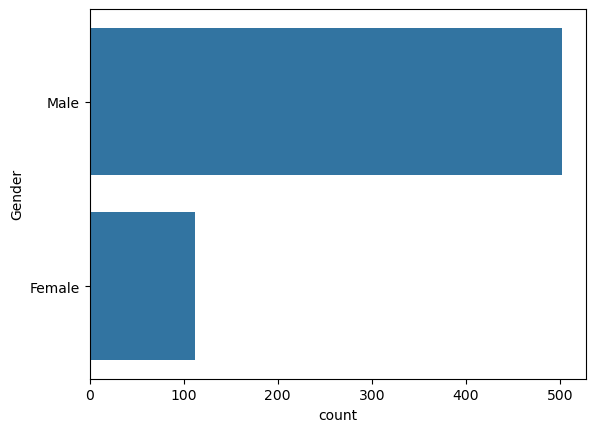

In [24]:
#categorical  feature visualization
sns.countplot(df['Gender'])

<Axes: xlabel='count', ylabel='Married'>

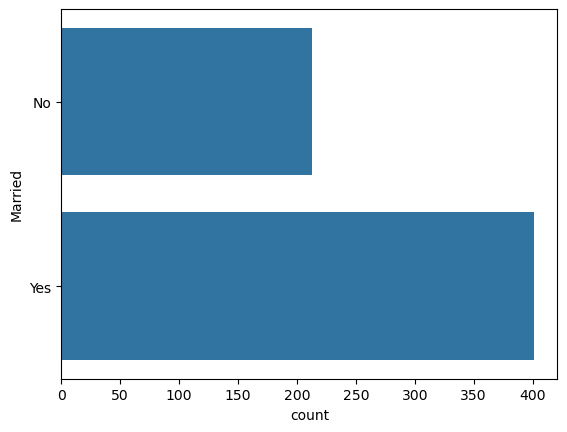

In [26]:
sns.countplot(df['Married'])

<Axes: xlabel='count', ylabel='Dependents'>

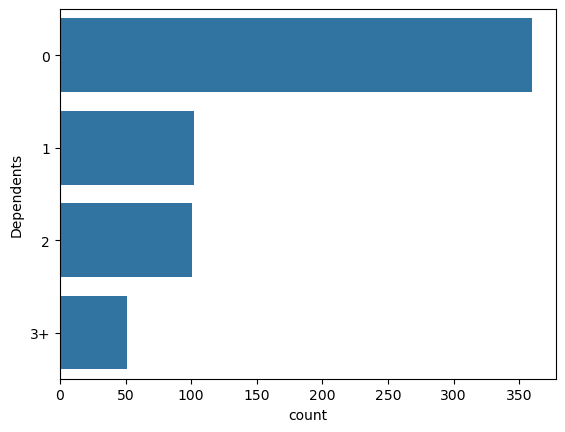

In [28]:
sns.countplot(df['Dependents'])

<Axes: xlabel='count', ylabel='Education'>

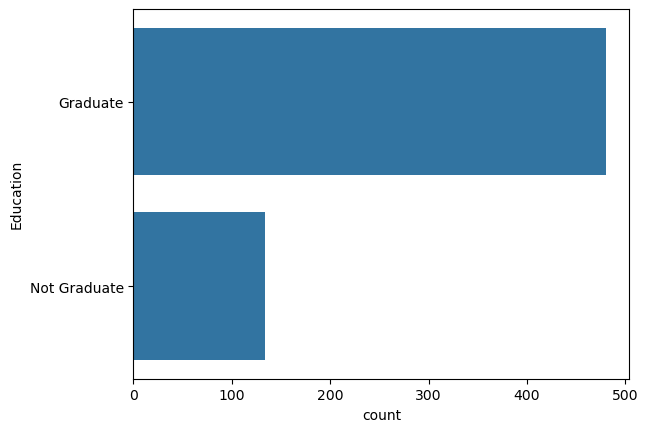

In [30]:
sns.countplot(df['Education'])

<Axes: xlabel='count', ylabel='Self_Employed'>

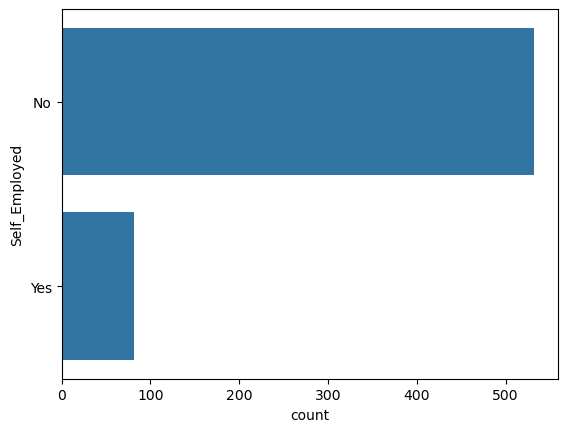

In [32]:
sns.countplot(df['Self_Employed'])

<Axes: xlabel='count', ylabel='Property_Area'>

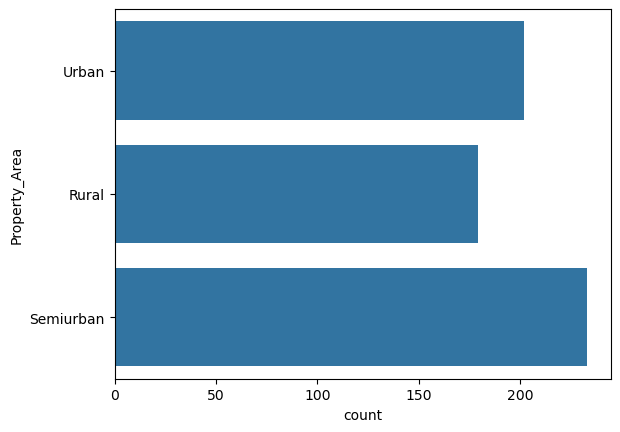

In [34]:
sns.countplot(df['Property_Area'])

<Axes: xlabel='count', ylabel='Loan_Status'>

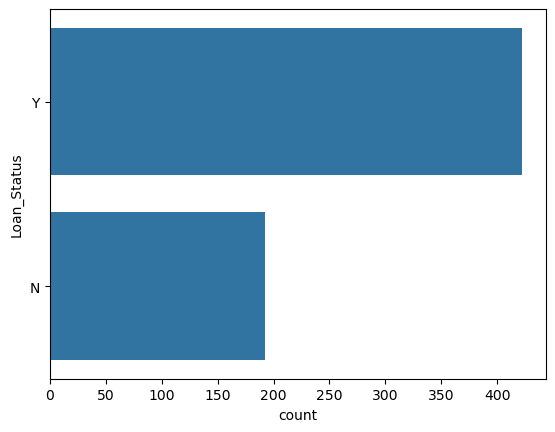

In [36]:
sns.countplot(df['Loan_Status'])

<Axes: xlabel='count', ylabel='Loan_Status'>

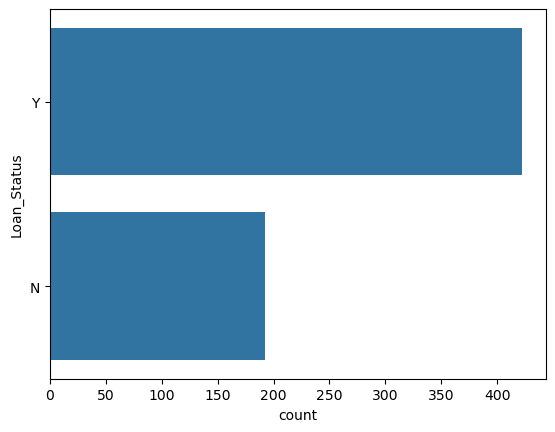

In [38]:
sns.countplot(df['Loan_Status'])

In [40]:
## Numerical feature vistualisation.

In [42]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

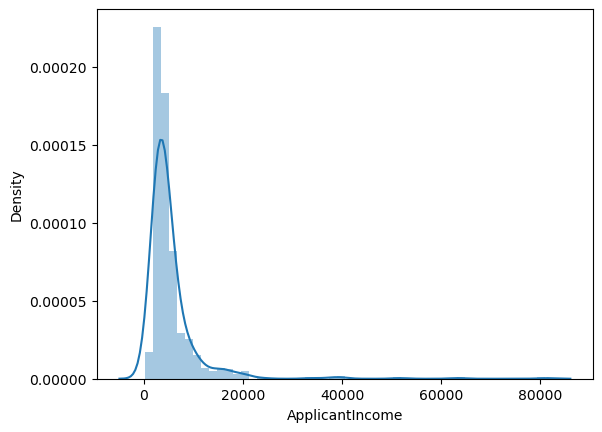

In [44]:
#Numerical feature visualisation
# Feature -1 Right skewed
sns.distplot(df['ApplicantIncome'])

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

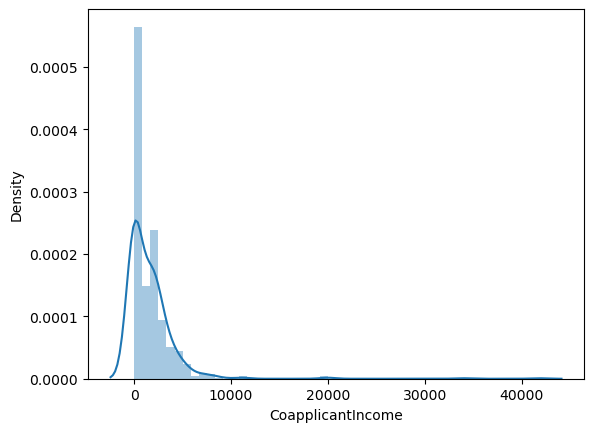

In [45]:
## Feature - 2 Right skewed
sns.distplot(df['CoapplicantIncome'])

<Axes: xlabel='LoanAmount', ylabel='Density'>

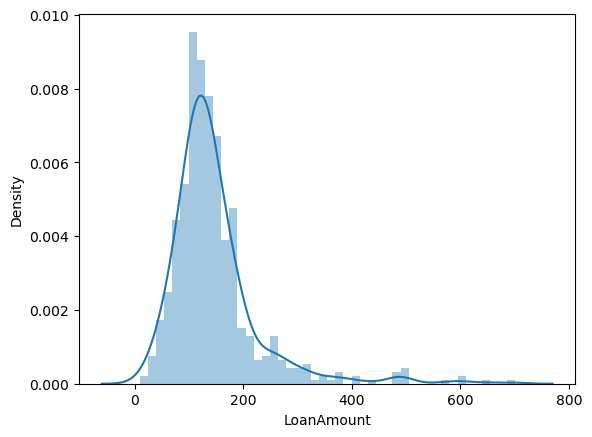

In [47]:
## Feature - 3 Right skewed
sns.distplot(df['LoanAmount'])

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

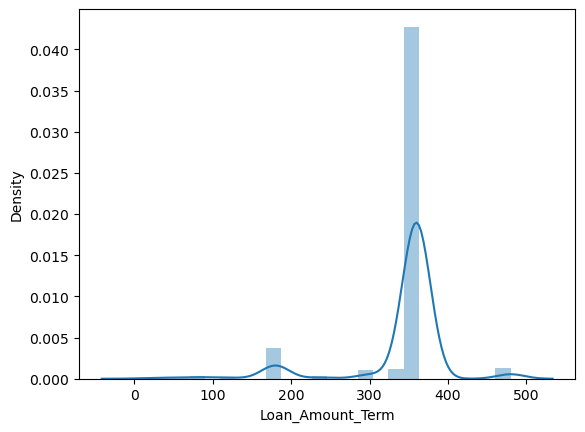

In [49]:
## Feature - 4
sns.distplot(df['Loan_Amount_Term'])

<Axes: xlabel='Credit_History', ylabel='Density'>

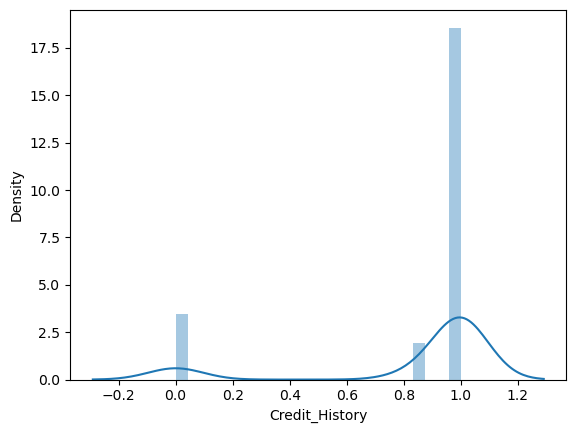

In [51]:
## Feature - 4
sns.distplot(df['Credit_History'])

In [54]:
## Create a new attribute
# Total Income

df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0


<Axes: xlabel='ApplicantIncome_Log', ylabel='Density'>

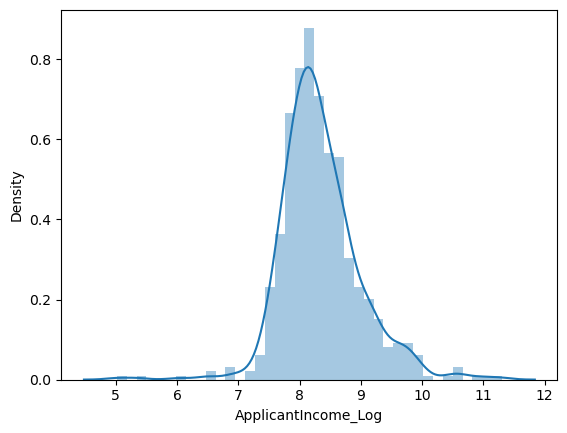

In [56]:
## Log Transformation of all numerical columns and their visual representaion
df['ApplicantIncome_Log'] = np.log(df['ApplicantIncome']+1)
sns.distplot(df['ApplicantIncome_Log'])

<Axes: xlabel='CoapplicantIncome_Log', ylabel='Density'>

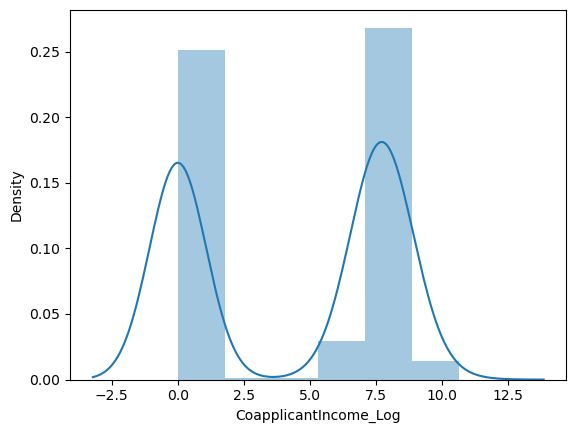

In [58]:
df['CoapplicantIncome_Log'] = np.log(df['CoapplicantIncome']+1)
sns.distplot(df['CoapplicantIncome_Log'])

<Axes: xlabel='LoanAmount_Log', ylabel='Density'>

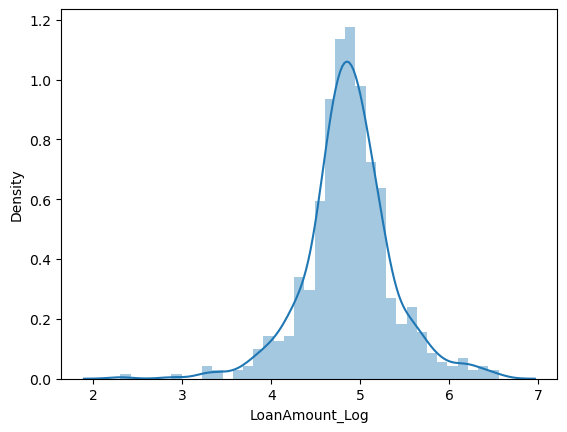

In [60]:
df['LoanAmount_Log'] = np.log(df['LoanAmount']+1)
sns.distplot(df['LoanAmount_Log'])

<Axes: xlabel='Loan_Amount_Term_Log', ylabel='Density'>

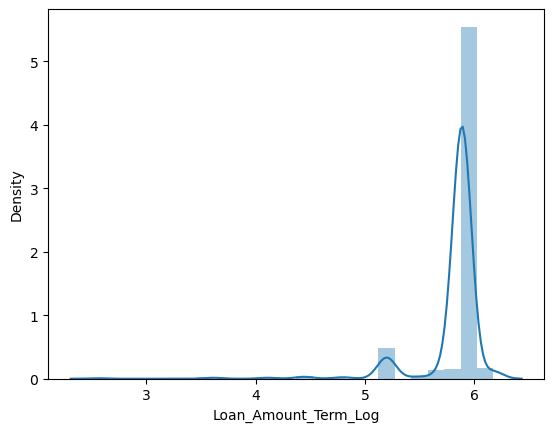

In [62]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
sns.distplot(df['Loan_Amount_Term_Log'])

<Axes: xlabel='Credit_History_Log', ylabel='Density'>

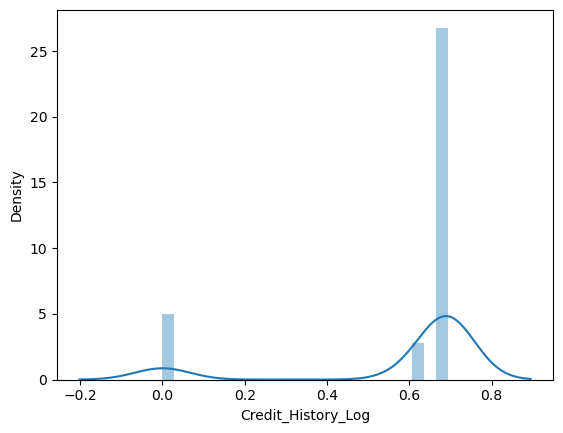

In [63]:
df['Credit_History_Log'] = np.log(df['Credit_History']+1)
sns.distplot(df['Credit_History_Log'])

<Axes: xlabel='Total_Income_Log', ylabel='Density'>

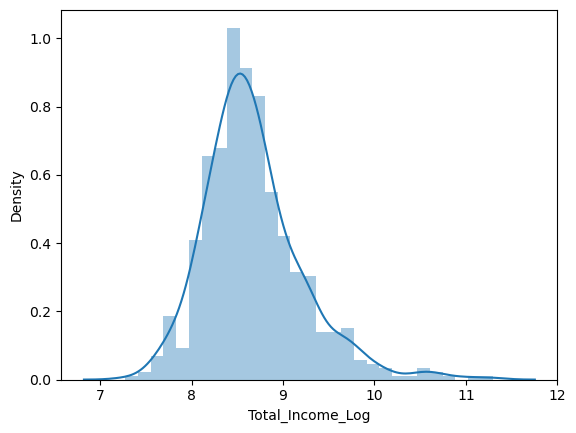

In [66]:
df['Total_Income_Log'] = np.log(df['Total_Income']+1)
sns.distplot(df['Total_Income_Log'])

In [67]:
df = df.drop(columns='Loan_ID')
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncome_Log,CoapplicantIncome_Log,LoanAmount_Log,Loan_Amount_Term_Log,Credit_History_Log,Total_Income_Log
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674197,0.0,4.993232,5.888878,0.693147,8.674197


<Axes: >

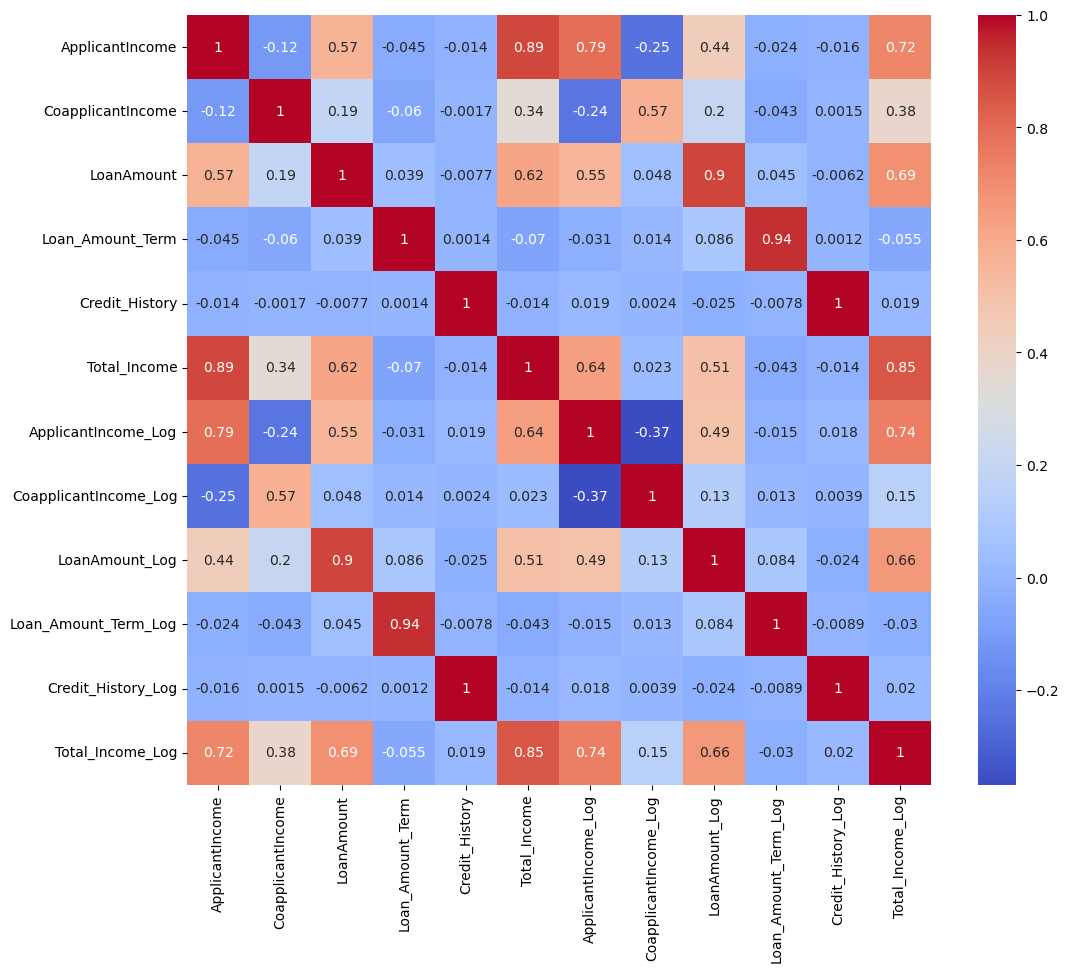

In [70]:
## Correlation Matrix
corr = df.corr(numeric_only = True)
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot = True, cmap = 'coolwarm')

In [73]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income', 'ApplicantIncome_Log', 'CoapplicantIncome_Log',
       'LoanAmount_Log', 'Loan_Amount_Term_Log', 'Credit_History_Log',
       'Total_Income_Log'],
      dtype='object')

In [75]:
## drop unnecessary  columns
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','CoapplicantIncome_Log']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Log,LoanAmount_Log,Loan_Amount_Term_Log,Credit_History_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.993232,5.888878,0.693147,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,0.693147,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,0.693147,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,0.693147,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,0.693147,8.699681


In [77]:
## Label encoding for categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols  = ['Gender','Married','Self_Employed','Education','Dependents','Property_Area','Loan_Status']
for i in cols:
    df[i] = le.fit_transform(df[i])

In [79]:
## LOAN STATUS 
#1- Y
#0 - N

df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Log,LoanAmount_Log,Loan_Amount_Term_Log,Credit_History_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674197,4.993232,5.888878,0.693147,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,0.693147,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,0.693147,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,0.693147,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,0.693147,8.699681


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                614 non-null    int32  
 1   Married               614 non-null    int32  
 2   Dependents            614 non-null    int32  
 3   Education             614 non-null    int32  
 4   Self_Employed         614 non-null    int32  
 5   Credit_History        614 non-null    float64
 6   Property_Area         614 non-null    int32  
 7   Loan_Status           614 non-null    int32  
 8   ApplicantIncome_Log   614 non-null    float64
 9   LoanAmount_Log        614 non-null    float64
 10  Loan_Amount_Term_Log  614 non-null    float64
 11  Credit_History_Log    614 non-null    float64
 12  Total_Income_Log      614 non-null    float64
dtypes: float64(6), int32(7)
memory usage: 45.7 KB


In [139]:
# input features and target
x = df.drop(columns='Loan_Status')
y = df['Loan_Status'].values.ravel()

In [141]:
from sklearn.model_selection import train_test_split, cross_val_score
# Classify function

def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is: ", model.score(x_test, y_test) * 100)

    score = cross_val_score(model, x, y, cv=5)
    print("Cross-validation: ", np.mean(score) * 100)

In [143]:
from sklearn.linear_model import LogisticRegression
# Train model  - Logistic regression

model = LogisticRegression()
classify(model, x, y)


Accuracy is:  77.27272727272727
Cross-validation:  80.9462881514061


In [145]:
from sklearn.tree import DecisionTreeClassifier
# Train model  - Decision Tree

model = DecisionTreeClassifier()
classify(model,x,y)

Accuracy is:  71.42857142857143
Cross-validation:  71.50073304011728


In [147]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
# Train modek  - Random forest

model = RandomForestClassifier()
classify(model, X, y)

Accuracy is:  79.22077922077922
Cross-validation:  77.85285885645742


In [151]:
model = ExtraTreesClassifier()
classify(model,x,y)

Accuracy is:  72.72727272727273
Cross-validation:  77.53032120485139


In [153]:
## Hyperparameter Tuning-Randome forest
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7,max_features=1)
classify(model,x,y)

Accuracy is:  77.27272727272727
Cross-validation:  80.78368652538984


## Confusion matrix

In [162]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

model = RandomForestClassifier()
model.fit(x_train, y_train)  

RandomForestClassifier()

In [164]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[22, 32],
       [ 2, 98]], dtype=int64)

<Axes: >

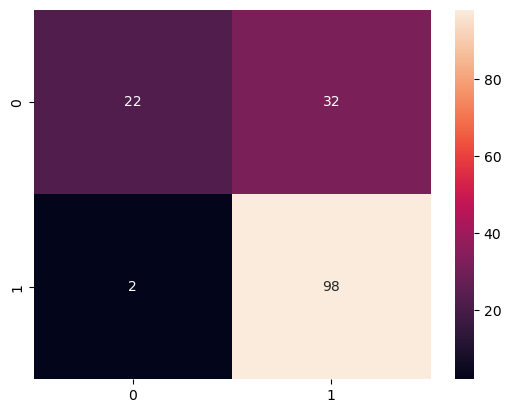

In [166]:
sns.heatmap(cm,annot=True)